<a href="https://colab.research.google.com/github/a00377571/IBM-Python101/blob/main/A3a_DL_TC5033_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [2]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = '/content/sample_data/Embeddings/glove.6B.50d.txt'
emb_dim = 50

In [11]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
  embeddings_dict = {}
  with open(path, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

  return embeddings_dict


In [16]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)
print(f'Number of words: {len(embeddings_dict)}')

Number of words: 400000


In [13]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [14]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [15]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

In [50]:
embeddings_dict['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

### Plot some embeddings

In [27]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func):
  embeddings =np.zeros((len(words2show), emb_dim))
  words2idx = {w: i for i, w in enumerate(words2show)}
  emb_dict = {}
  for word in words2show:
    idx = words2idx[word]
    embeddings[idx] = embeddings_dict[word]

  if func == PCA:
    pca = PCA(n_components=2, random_state=43)
    vectors_2d = pca.fit_transform(embeddings)
  else:
    tsne = TSNE(n_components=2, random_state=43)
    vectors_2d = tsne.fit_transform(embeddings)

  plt.figure(figsize=(20, 10))
  plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='red',edgecolors = 'r')
  for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
  plt.show()

  return embeddings


In [28]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


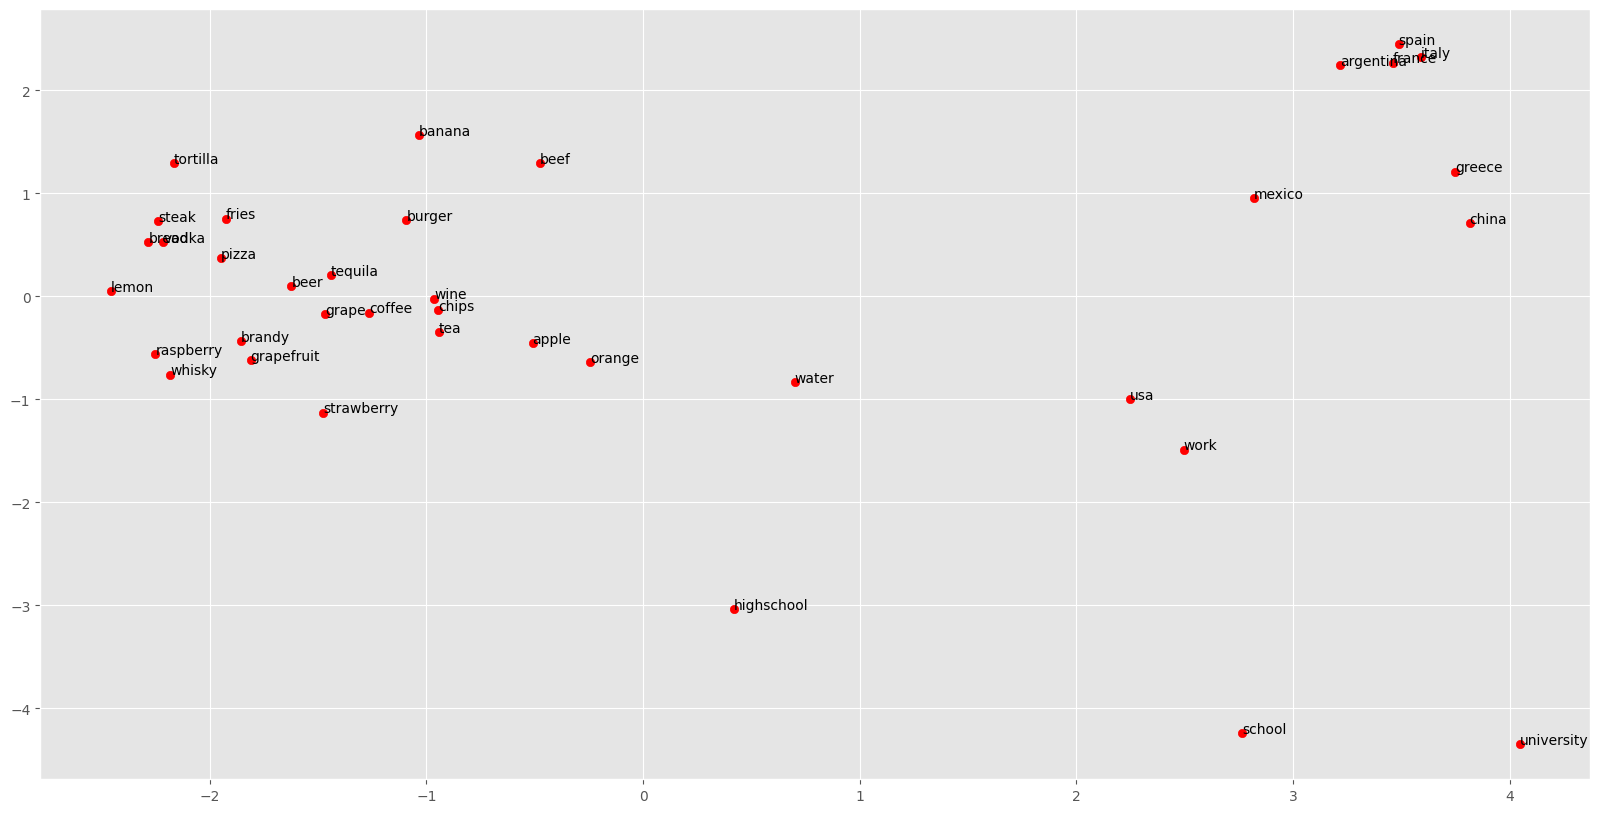

array([[ 0.36973   , -1.17970002, -0.92374998, ..., -0.54113001,
         0.21458   ,  0.81220001],
       [-0.80619001, -1.02450001, -0.28062001, ..., -0.47771001,
        -0.30274999,  0.012332  ],
       [-0.37436   , -0.11959   , -0.87608999, ..., -0.10138   ,
        -0.51134998, -0.18633001],
       ...,
       [ 0.51358998,  0.19695   , -0.51944   , ...,  0.046842  ,
        -0.62897003,  0.35725999],
       [-1.10819995,  1.29159999, -0.78750998, ...,  0.26267999,
        -0.54315001,  0.035944  ],
       [-0.94611001,  0.64415997, -0.30484   , ...,  0.092469  ,
         0.54044998, -0.28299001]])

In [29]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

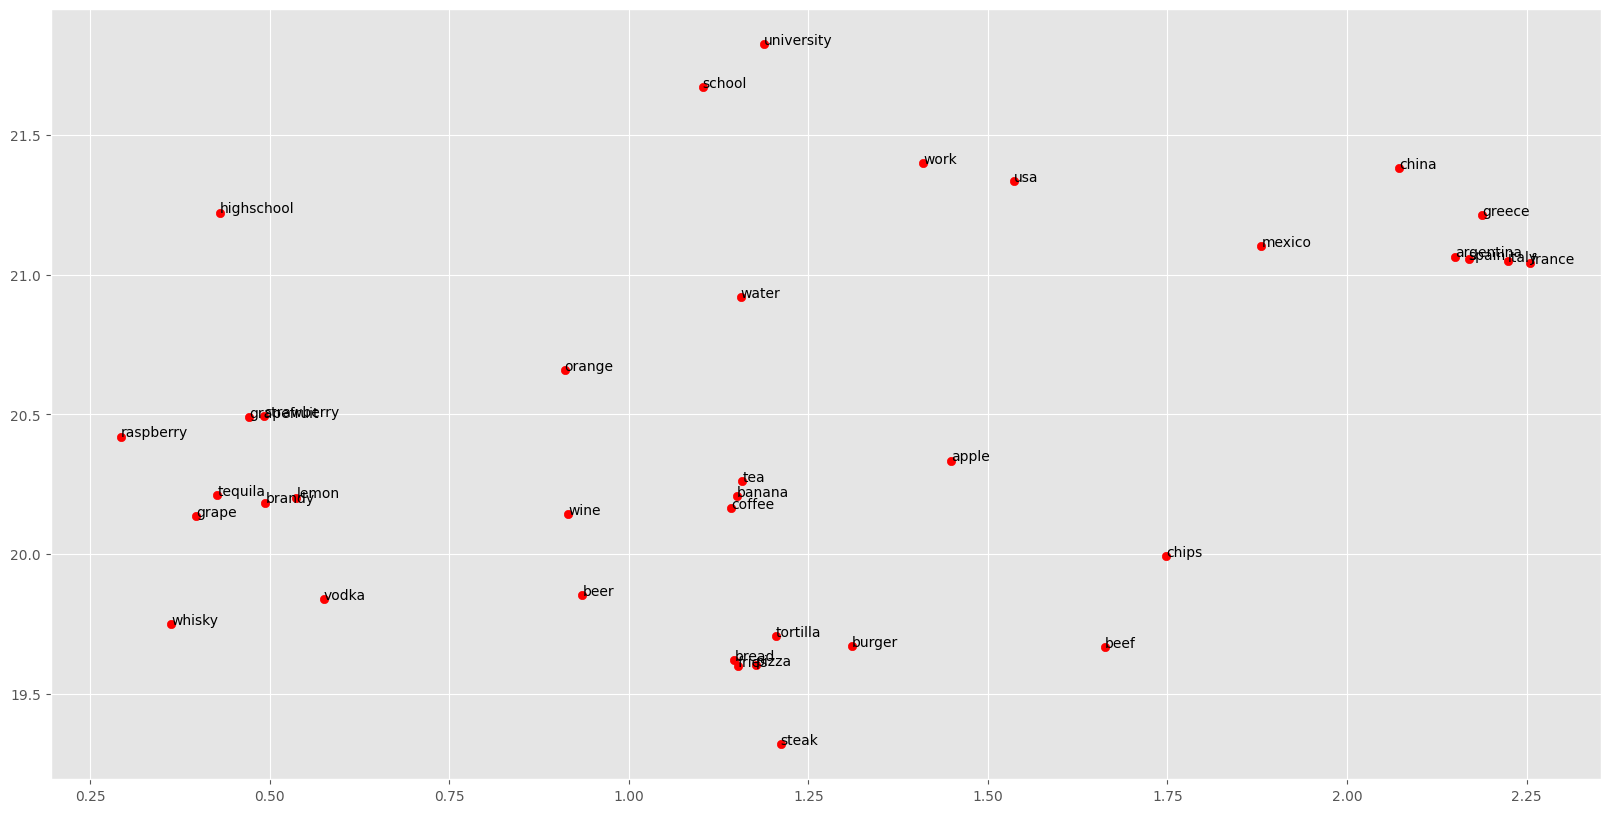

In [32]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

In [35]:
from scipy import spatial

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


In [36]:
find_closest_embeddings(embeddings_dict["king"])

['king',
 'prince',
 'queen',
 'uncle',
 'ii',
 'grandson',
 'brother',
 'kingdom',
 'son',
 'nephew',
 'elder',
 'iv',
 'ruler',
 'cousin',
 'name',
 'monarch',
 'father',
 'grandfather',
 'reign',
 'throne',
 'iii',
 'lord',
 'henry',
 'mentioned',
 'vi',
 'edward',
 'succeeded',
 'crown',
 'homage',
 'emperor',
 'sons',
 'latter',
 'philip',
 'eldest',
 'later',
 'patron',
 'viii',
 'coronation',
 'heir',
 'brother-in-law',
 'vii',
 'frederick',
 'majesty',
 'charles',
 'mr.',
 'legend',
 'successor',
 'knight',
 'elizabeth',
 'brought',
 'empire',
 'birthplace',
 'as',
 'tribute',
 'hero',
 'assumed',
 'constantine',
 'caesar',
 'george',
 'son-in-law',
 'occasion',
 'napoleon',
 'soon',
 'great',
 'famous',
 'deposed',
 'took',
 'family',
 'once',
 'himself',
 'noble',
 'sir',
 'chose',
 'john',
 '’s',
 'proclaimed',
 'father-in-law',
 'became',
 'imperial',
 'beloved',
 'death',
 'succession',
 'refer',
 'rulers',
 'came',
 'named',
 'footsteps',
 'upon',
 'mr',
 'honour',
 'harr

In [37]:
find_closest_embeddings(embeddings_dict["king"])[:5]

['king', 'prince', 'queen', 'uncle', 'ii']

In [38]:
find_closest_embeddings(embeddings_dict["king"])[1:6]

['prince', 'queen', 'uncle', 'ii', 'grandson']

In [49]:
find_closest_embeddings(embeddings_dict["mexico"])[:10]

['mexico',
 'venezuela',
 'peru',
 'mexican',
 'chile',
 'colombia',
 'puerto',
 'rico',
 'guatemala',
 'panama']

In [47]:
find_closest_embeddings(embeddings_dict["mexico"])[1:6]

['venezuela', 'peru', 'mexican', 'chile', 'colombia']

Analogy

In [41]:
# prompt: Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function

def analogy(word1, word2, word3,embeddings_dict):
    """
    Solves analogies between words using word embeddings.

    For example, "man is to king as woman is to ____".
    """
    try:
        word1_embedding = embeddings_dict[word1]
        word2_embedding = embeddings_dict[word2]
        word3_embedding = embeddings_dict[word3]

        # Calculate the analogy vector
        analogy_vector = word2_embedding - word1_embedding + word3_embedding

        # Find the closest word to the analogy vector
        closest_words = find_closest_embeddings(analogy_vector)

        # Return the closest word that is not one of the input words
        for word in closest_words:
            if word not in [word1, word2, word3]:
                return word
        return None  # No suitable word found

    except KeyError:
        return None  # One or more words not found in the embeddings



### Let us compute analogies

In [42]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [44]:
# prompt: Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function

import numpy as np
from scipy import spatial

def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Finds the top_n most similar words to the input word based on cosine similarity.
    """
    try:
        word_embedding = embeddings_dict[word]
    except KeyError:
        return f"Word '{word}' not found in the dictionary."

    similarities = {}
    for other_word, other_embedding in embeddings_dict.items():
        if other_word != word:
            similarity = 1 - spatial.distance.cosine(word_embedding, other_embedding)
            similarities[other_word] = similarity

    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    return sorted_similarities[:top_n]

In [45]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [46]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
